In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                             )

In [2]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Long-Movie-2Danalysis/"
files = ["SnailShadow.csv",
         "SnailCoreTATA.csv",
         "SnailCore.csv"]

In [3]:
full_data = pd.DataFrame()
for f in files : 
    print(f)
    read_data = pd.read_csv(path+f,index_col='Unnamed: 0')
    read_data['prot'] = f.split('.')[0]
    full_data = pd.concat([full_data, read_data], ignore_index=True)

SnailShadow.csv
SnailCoreTATA.csv
SnailCore.csv


In [4]:
full_data

,file_name,track_id,len_track,elongation_rate,init_translation_rate,tmp,prot
0,Snail S 061222 E1_1_track.csv,838,120.12,169.515497,266.432071,1,SnailShadow
1,Snail S 061222 E2_1_track.csv,8,111.54,124.995415,710.126784,1,SnailShadow
2,Snail S 061222 E2_1_track.csv,197,130.65,103.257014,236.217082,1,SnailShadow
3,Snail S 061222 E2_1_track.csv,275,110.76,160.499159,881.546625,1,SnailShadow
4,Snail S 061222 E2_1_track.csv,336,116.22,31.841062,94.553864,1,SnailShadow
...,...,...,...,...,...,...,...
210,SnailC 130123 E4_3_track.csv,1275,102.18,32.460375,65.547113,1,SnailCore
211,SnailC 130123 E4_3_track.csv,1441,110.37,66.607644,164.231580,1,SnailCore
212,SnailC 130123 E4_3_track.csv,1452,109.98,141.396223,600.675489,1,SnailCore
213,SnailC 130123 E4_3_track.csv,1456,109.98,71.150264,163.318341,1,SnailCore


/tmp/ipykernel_10261/2506913859.py:12: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  q25 = full_data.groupby('prot').quantile(0.25).reset_index()
/tmp/ipykernel_10261/2506913859.py:13: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  q75 = full_data.groupby('prot').quantile(0.75).reset_index()


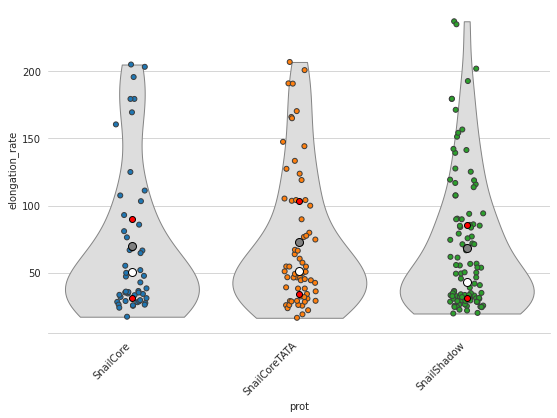

In [46]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(x='prot', y='elongation_rate', data=full_data, cut=0,
               scale='width', inner=None, linewidth=1, color='#DDDDDD',
               saturation=1)

sns.stripplot(x='prot', y='elongation_rate', data=full_data,
              jitter=True, linewidth=1)


means = full_data.groupby('prot').mean().reset_index()
medians = full_data.groupby('prot').median().reset_index()
q25 = full_data.groupby('prot').quantile(0.25).reset_index()
q75 = full_data.groupby('prot').quantile(0.75).reset_index()

sns.swarmplot(x='prot', y='elongation_rate', data=means, 
              color='grey', edgecolor='black', linewidth=1, size=8)

sns.swarmplot(x='prot', y='elongation_rate', data=medians, 
              color='white', edgecolor='black', linewidth=1, size=8)

sns.swarmplot(x='prot', y='elongation_rate', data=q25, 
              color='red', edgecolor='black', linewidth=1, size=6)

sns.swarmplot(x='prot', y='elongation_rate', data=q75, 
              color='red', edgecolor='black', linewidth=1, size=6)


_ = plt.xticks(rotation=45, ha='right')

sns.despine(left=True)

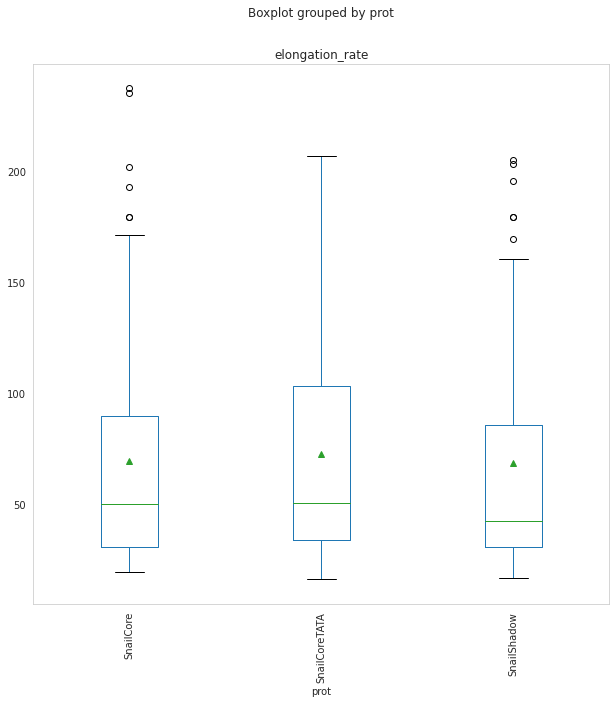

In [57]:
fig, ax = plt.subplots(1)
full_data.boxplot(['elongation_rate'] , 
               by='prot', 
               grid=False, 
               ax = ax,
               rot=90, 
                  showmeans=True
              )

fig.set_size_inches((10,10))

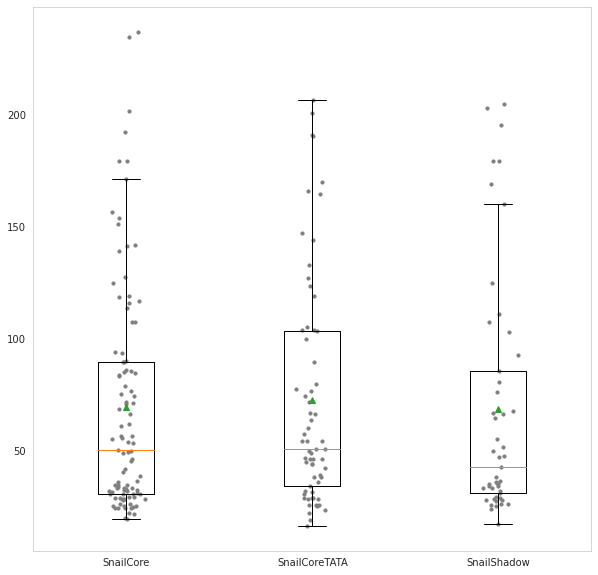

In [55]:
fig, ax = plt.subplots()

group = 'prot'
column = 'elongation_rate'
grouped = full_data.groupby(group)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

ax.boxplot(vals, labels=names, showmeans=True, showfliers=False)
ngroup = len(vals)


clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax.scatter(x, val, c='grey', alpha=1, s=10)
    
ax.grid(False)
fig.set_size_inches((10,10))